# **1. Perkenalan Dataset**



**Sumber Dataset**:https://www.kaggle.com/datasets/prasad22/healthcare-dataset
Dataset ini diperoleh dari repositori publik (**Kaggle**) dengan nama *Healthcare Dataset*. Dataset ini berisi informasi sintetis mengenai profil pasien, kondisi medis, dan detail administratif rumah sakit.

**Informasi Dataset**:
* **Nama Dataset**: Healthcare Dataset
* **Jumlah Data**: 55.500 baris
* **Jumlah Fitur**: 15 kolom
* **Format File**: CSV

**Daftar Kolom dan Deskripsi**:
1.  **Name**: Nama lengkap pasien.
2.  **Age**: Usia pasien.
3.  **Gender**: Jenis kelamin (Male/Female).
4.  **Blood Type**: Golongan darah pasien.
5.  **Medical Condition**: Kondisi medis utama (Diabetes, Cancer, dll).
6.  **Date of Admission**: Tanggal masuk rumah sakit.
7.  **Doctor**: Nama dokter yang menangani.
8.  **Hospital**: Nama rumah sakit.
9.  **Insurance Provider**: Penyedia asuransi.
10. **Billing Amount**: Biaya medis yang ditagihkan.
11. **Room Number**: Nomor ruangan.
12. **Admission Type**: Kategori pendaftaran (Urgent, Emergency, Elective).
13. **Discharge Date**: Tanggal keluar rumah sakit.
14. **Medication**: Obat yang diresepkan.
15. **Test Results**: Hasil akhir (Normal, Abnormal, Inconclusive).

**Tujuan Eksperimen**:
Melakukan eksplorasi data (EDA) dan prapemrosesan data (*preprocessing*) seperti penanganan data duplikat serta pengkodean variabel kategorikal agar data siap digunakan untuk model machine learning.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [3]:
import pandas as pd  # Untuk manipulasi data
import numpy as np  # Untuk operasi numerik
import matplotlib.pyplot as plt  # Untuk visualisasi
import seaborn as sns  # Untuk visualisasi yang lebih menarik
from sklearn.preprocessing import StandardScaler  # Untuk preprocessing
from sklearn.preprocessing import LabelEncoder  # Encoding Data Kategorikal
from sklearn.model_selection import train_test_split # Untuk membagi data

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [4]:
# Muat dataset
# Ganti dengan path file yang sesuai
file_path = 'healthcare_dataset.csv'
df = pd.read_csv(file_path)

# Tampilkan beberapa baris pertama dataset
print("5 Baris Pertama Dataset:")
print(df.head())

5 Baris Pertama Dataset:
            Name  Age  Gender Blood Type Medical Condition Date of Admission  \
0  Bobby JacksOn   30    Male         B-            Cancer        2024-01-31   
1   LesLie TErRy   62    Male         A+           Obesity        2019-08-20   
2    DaNnY sMitH   76  Female         A-           Obesity        2022-09-22   
3   andrEw waTtS   28  Female         O+          Diabetes        2020-11-18   
4  adrIENNE bEll   43  Female        AB+            Cancer        2022-09-19   

             Doctor                    Hospital Insurance Provider  \
0     Matthew Smith             Sons and Miller         Blue Cross   
1   Samantha Davies                     Kim Inc           Medicare   
2  Tiffany Mitchell                    Cook PLC              Aetna   
3       Kevin Wells  Hernandez Rogers and Vang,           Medicare   
4    Kathleen Hanna                 White-White              Aetna   

   Billing Amount  Room Number Admission Type Discharge Date   Medication

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [5]:
# Informasi umum: tipe data, jumlah non-null
print("\nInformasi Umum Dataset:")
df.info()

# Ukuran dataset (jumlah baris dan kolom)
print(f"\nUkuran Dataset: {df.shape}")

# Nama kolom
print("\nNama-nama Kolom:")
print(df.columns)


Informasi Umum Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), obj

In [6]:
# Statistik deskriptif kolom numerik
print("\nStatistik Deskriptif (Numerik):")
print(df.describe())

# Nilai unik pada kolom kategorikal
print("\nJumlah Nilai Unik Kolom Kategorikal:")
print(df.select_dtypes(include='object').nunique())


Statistik Deskriptif (Numerik):
                Age  Billing Amount   Room Number
count  55500.000000    55500.000000  55500.000000
mean      51.539459    25539.316097    301.134829
std       19.602454    14211.454431    115.243069
min       13.000000    -2008.492140    101.000000
25%       35.000000    13241.224652    202.000000
50%       52.000000    25538.069376    302.000000
75%       68.000000    37820.508436    401.000000
max       89.000000    52764.276736    500.000000

Jumlah Nilai Unik Kolom Kategorikal:
Name                  49992
Gender                    2
Blood Type                8
Medical Condition         6
Date of Admission      1827
Doctor                40341
Hospital              39876
Insurance Provider        5
Admission Type            3
Discharge Date         1856
Medication                5
Test Results              3
dtype: int64


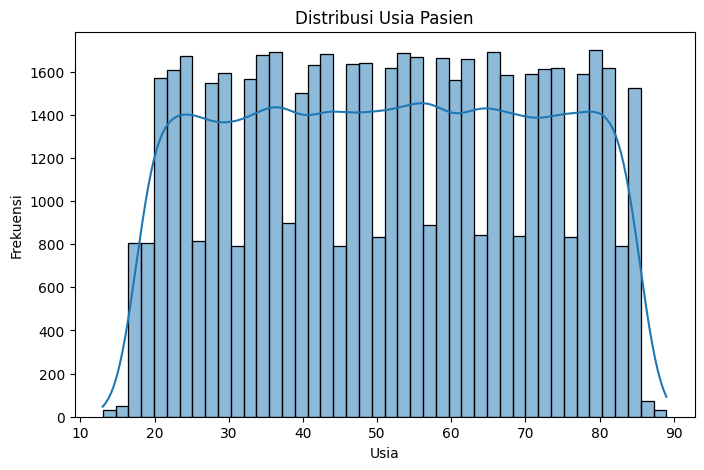

In [7]:
# Distribusi usia pasien (Age)
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], kde=True)
plt.title('Distribusi Usia Pasien')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.show()

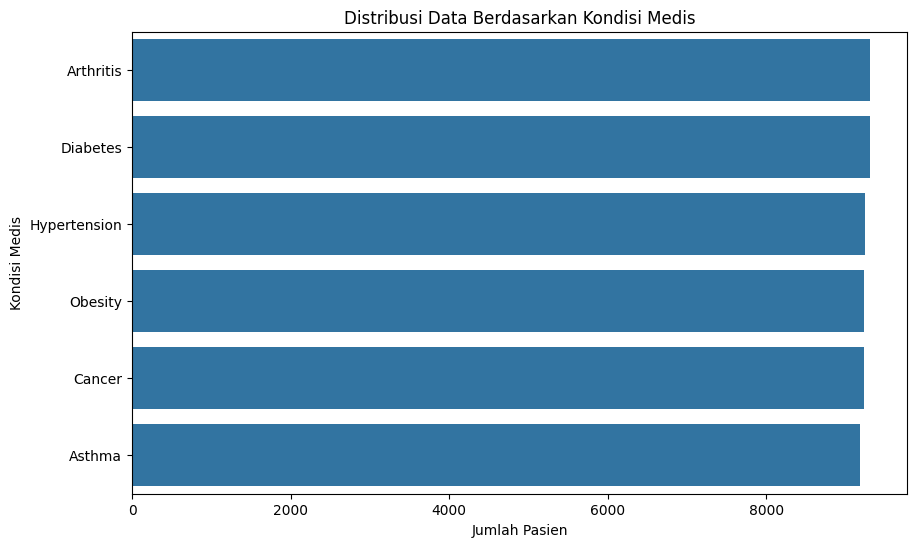

In [8]:
# Distribusi berdasarkan Medical Condition
plt.figure(figsize=(10, 6))
sns.countplot(y='Medical Condition', data=df,
              order=df['Medical Condition'].value_counts().index)
plt.title('Distribusi Data Berdasarkan Kondisi Medis')
plt.xlabel('Jumlah Pasien')
plt.ylabel('Kondisi Medis')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [9]:
# 1. Menghapus atau Menangani Data Kosong (Missing Values)
print("Cek Missing Values Awal:")
print(df.isnull().sum())

# Asumsi: Hanya ada sedikit missing values, hapus (sesuaikan dengan konteks dataset)
df = df.dropna()

# 2. Menghapus Data Duplikat
print(f"\nJumlah Duplikasi Awal: {df.duplicated().sum()}")
df = df.drop_duplicates()
print(f"Jumlah Duplikasi Setelah Dihapus: {df.duplicated().sum()}")

# 3. Encoding Data Kategorikal
# Identifikasi kolom kategorikal yang perlu di-encode
categorical_cols = df.select_dtypes(include='object').columns.tolist()
# Kita akan mengecualikan kolom 'Name' dan 'Patient ID' jika ada, karena tidak relevan untuk training
cols_to_encode = [col for col in categorical_cols if col not in ['Name', 'Patient ID']]

encoder = LabelEncoder()
for col in cols_to_encode:
    # Mengatasi kolom yang mungkin muncul saat cleaning data
    if col in df.columns:
        df[col + '_Encoded'] = encoder.fit_transform(df[col])
        # Opsional: hapus kolom asli jika sudah di-encode
        df = df.drop(columns=[col])

print("\n5 Baris Pertama Setelah Encoding:")
print(df.head())

# 4. Normalisasi atau Standarisasi Fitur (Untuk kolom numerik target/penting) ---
# Misalnya, kita standarisasi 'Billing Amount'
scaler = StandardScaler()
# Pastikan kolom Billing Amount ada dan tipenya numerik (diasumsikan 'float'/'int')
if 'Billing Amount' in df.columns:
    df['Billing_Amount_Scaled'] = scaler.fit_transform(df[['Billing Amount']])


Cek Missing Values Awal:
Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

Jumlah Duplikasi Awal: 534
Jumlah Duplikasi Setelah Dihapus: 0

5 Baris Pertama Setelah Encoding:
            Name  Age  Billing Amount  Room Number  Gender_Encoded  \
0  Bobby JacksOn   30    18856.281306          328               1   
1   LesLie TErRy   62    33643.327287          265               1   
2    DaNnY sMitH   76    27955.096079          205               0   
3   andrEw waTtS   28    37909.782410          450               0   
4  adrIENNE bEll   43    14238.317814          458               0   

   Blood Type_Encoded  Medical Condition_Encoded  Date of Admission_Encoded  \
0  

In [10]:

# Tampilkan hasil akhir preprocessing (termasuk kolom baru)
print("\nStruktur Akhir Dataset:")
print(df.info())

# --- Simpan dataset hasil preprocessing ---
cleaned_file_path = 'healthcare_dataset_cleaned.csv'
df.to_csv(cleaned_file_path, index=False)
print(f"\nDataset telah berhasil disimpan sebagai '{cleaned_file_path}'")


Struktur Akhir Dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 54966 entries, 0 to 55499
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Name                        54966 non-null  object 
 1   Age                         54966 non-null  int64  
 2   Billing Amount              54966 non-null  float64
 3   Room Number                 54966 non-null  int64  
 4   Gender_Encoded              54966 non-null  int64  
 5   Blood Type_Encoded          54966 non-null  int64  
 6   Medical Condition_Encoded   54966 non-null  int64  
 7   Date of Admission_Encoded   54966 non-null  int64  
 8   Doctor_Encoded              54966 non-null  int64  
 9   Hospital_Encoded            54966 non-null  int64  
 10  Insurance Provider_Encoded  54966 non-null  int64  
 11  Admission Type_Encoded      54966 non-null  int64  
 12  Discharge Date_Encoded      54966 non-null  int64  
 13  Medication_

In [11]:

!pip freeze requirements.txt

absl-py==1.4.0
accelerate==1.12.0
access==1.1.10.post3
affine==2.4.0
aiofiles==24.1.0
aiohappyeyeballs==2.6.1
aiohttp==3.13.2
aiosignal==1.4.0
aiosqlite==0.22.0
alabaster==1.0.0
albucore==0.0.24
albumentations==2.0.8
ale-py==0.11.2
alembic==1.17.2
altair==5.5.0
annotated-doc==0.0.4
annotated-types==0.7.0
antlr4-python3-runtime==4.9.3
anyio==4.12.0
anywidget==0.9.21
argon2-cffi==25.1.0
argon2-cffi-bindings==25.1.0
array_record==0.8.3
arrow==1.4.0
arviz==0.22.0
astropy==7.2.0
astropy-iers-data==0.2025.12.15.0.40.51
astunparse==1.6.3
atpublic==5.1
attrs==25.4.0
audioread==3.1.0
Authlib==1.6.6
autograd==1.8.0
babel==2.17.0
backcall==0.2.0
beartype==0.22.9
beautifulsoup4==4.13.5
betterproto==2.0.0b6
bigframes==2.31.0
bigquery-magics==0.10.3
bleach==6.3.0
blinker==1.9.0
blis==1.3.3
blobfile==3.1.0
blosc2==3.12.2
bokeh==3.7.3
Bottleneck==1.4.2
bqplot==0.12.45
branca==0.8.2
brotli==1.2.0
CacheControl==0.14.4
cachetools==6.2.4
catalogue==2.0.10
certifi==2025.11.12
cffi==2.0.0
chardet==5.2.0
cha

In [ ]:
from google.colab import files

!pip freeze > requirements.txt
files.download('requirements.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [12]:
# automate_Nama-siswa.py (Contoh)

import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
import os

def preprocess_data(raw_data_path):
    """
    Melakukan semua langkah preprocessing yang didefinisikan di notebook eksperimen.
    """
    df = pd.read_csv(raw_data_path)

    # 1. Penanganan Missing Values dan Duplikat
    df = df.dropna()
    df = df.drop_duplicates()

    # 2. Encoding Kategorikal (contoh menggunakan LabelEncoder)
    cols_to_encode = ['Gender', 'Blood Type', 'Medical Condition'] # Sesuaikan dengan dataset Anda
    encoder = LabelEncoder()
    for col in cols_to_encode:
        if col in df.columns:
            df[col + '_Encoded'] = encoder.fit_transform(df[col])
            df = df.drop(columns=[col])

    # 3. Scaling Numerik (contoh: Billing Amount)
    scaler = StandardScaler()
    if 'Billing Amount' in df.columns:
        df['Billing_Amount_Scaled'] = scaler.fit_transform(df[['Billing Amount']])
        df = df.drop(columns=['Billing Amount']) # Hapus kolom asli

    # Opsional: Hapus kolom non-fitur (Name, Patient ID, dll.)
    df = df.drop(columns=['Name', 'Patient ID'], errors='ignore')

    return df

if __name__ == '__main__':
    # Contoh penggunaan dan penyimpanan

    # Pastikan direktori ada sebelum menyimpan file
    output_dir = 'preprocessing/namadataset_preprocessing'
    os.makedirs(output_dir, exist_ok=True)

    cleaned_df = preprocess_data('healthcare_dataset.csv')
    cleaned_df.to_csv(os.path.join(output_dir, 'healthcare_cleaned.csv'), index=False)
    print("Preprocessing otomatis selesai. Data disimpan.")

Preprocessing otomatis selesai. Data disimpan.
